### Übungsblatt 5 - Cluster Algorithmen

In [1]:
import src.cluster.cluster_algorithm as Ca
from src.Graph import Graph
from src.printGraph import draw_graph
from src.cluster.modularity_clustering import modularity_clustering

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from time import time
import random

Min Cut Algorithmus

Algorithmus von Stoer und Wagner. Findet mehrere Cuts und wählt den minimalen aus. Wir haben den Algorithmus so abgewandelt, dass er den minimum cut auf einem Cluster findet.

Der Algorithmus gibt die Menge die 'abgeschnitten' wird und das Gewicht des Schnitts.

In [2]:
G = Graph("networks/out.ucidata-zachary_")

# example of minimum cut on entire Graph
print(Ca.find_minimum_cut(G, G.get_nodes()))

[{'12'}, 1]


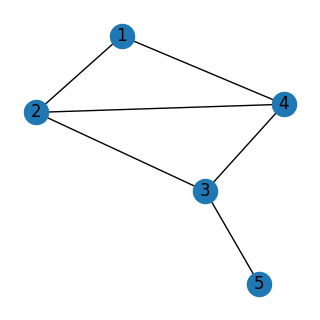

In [3]:
G = Graph()

G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(4, 1)
G.add_edge(2, 4)
G.add_edge(3, 5)

fig = plt.figure(figsize=(3, 3))
draw_graph(G, label_on=True)

In [4]:
# Anwendungsbeispiel
nodes = G.get_nodes()
result = Ca.find_minimum_cut(G, nodes)
print(result)

[{'2', '3', '1', '4'}, 1]


In [5]:
# Laufzeit auf vollen Graphen -> Algorithmus wurde nicht weiter optmiert
for path in ["networks/bio-celegans.mtx", "networks/out.adjnoun_adjacency_adjacency_", "networks/out.moreno_zebra_zebra_", "networks/out.ucidata-zachary_", "networks/special_case_for_networkx.mtx"]:
    try:
        G = Graph(path)
    except:
        G = Graph(path, mode=Graph.READ_MOD_METIS)
    start = time()
    Ca.find_minimum_cut(G)
    print(f"Min Cut Algorithm for n={G.n} and m={G.m} needed {time() - start} seconds.")


Min Cut Algorithm for n=453 and m=2025 needed 42.229790925979614 seconds.
Min Cut Algorithm for n=112 and m=425 needed 0.47893714904785156 seconds.
Min Cut Algorithm for n=27 and m=111 needed 0.005994081497192383 seconds.
Min Cut Algorithm for n=34 and m=78 needed 0.007508516311645508 seconds.
Min Cut Algorithm for n=12 and m=15 needed 0.001009225845336914 seconds.


# Cluster Heuristiken

![alternatvie text](presentation\pictures\first_and_second_heuristic.png)

![alternatvie text](presentation\pictures\cut_merge.png)

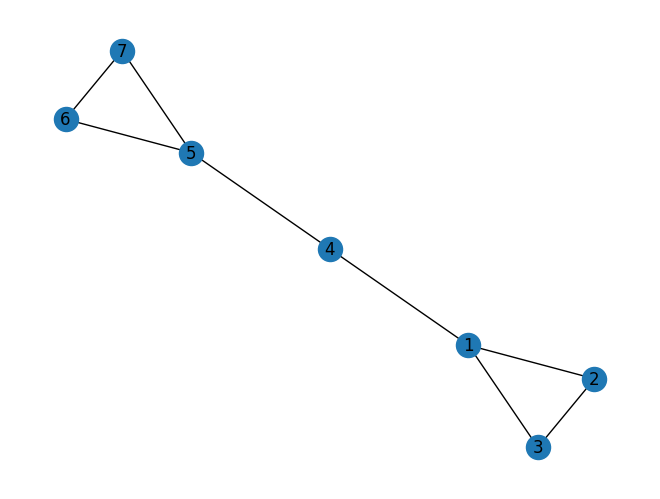

In [6]:
G = Graph()

G.add_edge(1,2)
G.add_edge(2,3)
G.add_edge(3,1)
G.add_edge(1,4)
G.add_edge(4,5)
G.add_edge(5,6)
G.add_edge(6,7)
G.add_edge(7,5)

draw_graph(G, label_on=True)

In [7]:
print("first_heuristic - modularity: ",Ca.first_heuristic(G,version="mod"))
print("second_heuristic - modularity: ",Ca.second_heuristic(G,version="mod"))

print("first_heuristic - disagreement: ",Ca.first_heuristic(G,version="dis"))
print("second_heuristic - disagreement: ",Ca.second_heuristic(G,version="dis"))

first_heuristic - modularity:  ([{'5', '6', '7', '4'}, {'2', '3', '1'}], 0.3671875)
second_heuristic - modularity:  ([{'7', '6', '5'}, {'2', '3', '1'}, {'4'}], 0.78125)
first_heuristic - disagreement:  ([{'6', '7', '2', '3', '4'}, {'1', '5'}], 1.0)
second_heuristic - disagreement:  ([{'6', '5', '7', '2', '1', '3', '4'}], 3.0)


# Merge based on Modularity
* berechnen der Möglichen Änderungen der Modularity für jeden Cluster-merge (Δ<sub>i,j</sub>)  und normalisierte Knotengrade a<sub>i,j</sub>
* Auswählen Cluster i und Cluster j mit max<sub>i,j</sub>(Δ<sub>i,j</sub>)
* nach jedem merge: updaten der Hilfsvariablen

### Implementierung
* priority queue / min-heap (heapq modul in python)
* Elemente in PQ: \
        priority: Δ<sub>i,j</sub> und element: (i,j)  

**1. Problem: min-heap**
> -(deltas) in PQ 

**2. Problem: wie sollen Elemente in PQ geupdated werden?** \
gegeben: Cluster j wird in Cluster i gemerged
* PQ[(i,j)] = (new_delta, (i,j)) geht nicht
* Operationen: \
        extract-min O(1) (heappop), \
        insert O(log n)(heappush) und \
        delete O(n) und lookup O(n)
        
**naive Lösung**: \
        durch alle (u,v) gehen wo i ∈ {u,v} \
        löschen des alten werts \
        berechnen & insert neuen wert

**Problem**: lookup O(N²). N- mal.. brauchen eventuell auch zugehöriges Δ<sub>u,j</sub> \
        dh. das dauert im worst case O(N³) 

**Lösung**: 
* Abspeichern aller relevanten deltas in einem dictionary \
                _{ (u,v) : ( delta, PQ-Index ) | i ∈ {u,v} xor j ∈ {u,v} }_ -> O(N²)
                
* Durchlaufen des dictionaries: -> O(N)  \
Abspeichern der Indices die aus PQ gelöscht werden sollen \
Abspeichern der neuen (delta, (u,v)) tupel die in PQ eingefügt werden sollen 

* Update von PQ O( N * logN)

Insgesamt: O(N² * logN) 

# Laufzeitanalyse

Zur Untersuchung der Laufzeit wurden verschieden große Netzwerke verwendet. In diesem Fall handelt es sich speziell um die \
Netzwerke: ["out.adjnoun_adjacency_adjacency_","out.moreno_zebra_zebra_",out.ucidata-zachary_","special_case_for_networkx.mtx"].\
(n=112,m=425)(n=27,m=111)(n=34,m=78)(n=12,m=15)\
\
![alternatvie text](presentation\pictures\Runtimes.png)

# Unterschied der Cluster der verschiedenen Verfahren

Ein Graph mit n = 112 und m = 425
![alternatvie text](presentation\pictures\Größenverteilung112.png)

Ein Graph mit n = 34 und m = 78
![alternatvie text](presentation\pictures\Größenverteilung34.png)

Ein Graph mit n = 27 und m = 111
![alternatvie text](presentation\pictures\Größenverteilung27.png)

Ein Graph mit n = 12 und m = 15
![alternatvie text](presentation\pictures\Größenverteilung12.png)

Es sind deutliche Muster zu erkennen:

* Die Mehthoden zeigen über verschiedenen Graphen scheinbar eine Tendenz für die Verteilung der Größe der einzelen Cluster
* First-dis: Nicht besonders aussagekräftig, da es zu meist nur bis zu zwei Cluster erkennt
* Second-dis: Ebenso wie First-dis nur hier gibt es viele Cluster der größe 1 und nur ein Cluster mit mehr Knoten
> Eigenschaft der Startbedingung von Second und First
* Second-mod: Hat zumeist viele kleine Cluster und einige größere -> Startbedingung
* First-mod und Modularity haben ähnliche Verteilungen und eine ähnliche Anzahl an Clustern

#### (n = 12, m = 15)
![alternatvie text](presentation\pictures\n=12m=15.png)
* First-mod und Modularity sind mit 0.82 recht ähnlich 
* First-dis und Second-dis sind sich mit 0.09 fast garnicht ähnlich -> deckt sich mit obiger Beobachtung
* Second-Mod hat mit Werten im Bereich von 0.7 Ähnlichkeiten mit First-Mod und Modularity-clustering

#### (n = 34, m = 78)
![alternatvie text](presentation\pictures\n=34m=78.png)

#### (n = 27, m = 111)
![alternatvie text](presentation\pictures\n=27m=111.png)

#### (n = 112, m = 425)
![alternatvie text](presentation\pictures\n=112m=425.png)
> Anscheind ist hier eine Ausnahme, dass First-mod und Modularity-clustering relativ ähnlich zu dem Ergebniss aus Second-dis sind

# Interprätation der gefundenen Cluster

In [8]:
def visualize_segmentation(file, calc_segmentation, mode, optimize):
    nxG = nx.read_gexf(file)
    nxG = nx.relabel_gexf_graph(nxG)
    G = Graph()
    for n in nxG.nodes():
        n = n.replace(" ","_")
        G.add_node(n)
    for e1, e2 in nxG.edges():
        e1 = e1.replace(" ", "_")
        e2 = e2.replace(" ", "_")
        G.add_edge(e1,e2)

    segmentation = calc_segmentation(G, mode = mode, optimize = optimize)

    colors = ["green", "yellow","red", "blue", "pink", "purple", "orange"]
    color_id = 0
    nx_index = [n for n in nxG]
    color_map = [ "black" for n in nxG]
    for segment in segmentation:
        if color_id < len(colors):
            color = colors[color_id]
        else:
            color = "#"+''.join([random.choice('ABCDEF0123456789') for i in range(6)])
        for n in nxG:
            if n.replace(" ", "_") in segment:
                color_map[nx_index.index(n)] = color
        color_id += 1

    # 1114, 833, 1997, 764,  947, 164
    seed = random.randint(1,2000)
    print(seed)

    my_pos = nx.spring_layout(nxG, seed = 1104)
    plt.figure(figsize=(12,12))
    nx.draw(nxG, pos = my_pos, node_color= color_map,with_labels=True, node_size=500, edge_color='black', linewidths=1, font_size=8)
    plt.title((mode, optimize), fontsize=30)
    plt.show()

In [9]:
def clustering(G, mode = "cut", optimize="modularity"):
    if mode == "cut":
        if optimize == "modularity":
            cl, _ = Ca.second_heuristic(G)
        else:
            cl, _ = Ca.second_heuristic(G, version = "dis")
    if mode == "merge":
        if optimize == "modularity":
            cl = modularity_clustering(G) #meine funktion
        else:
            cl, _ = Ca.first_heuristic(G)
    return cl

710


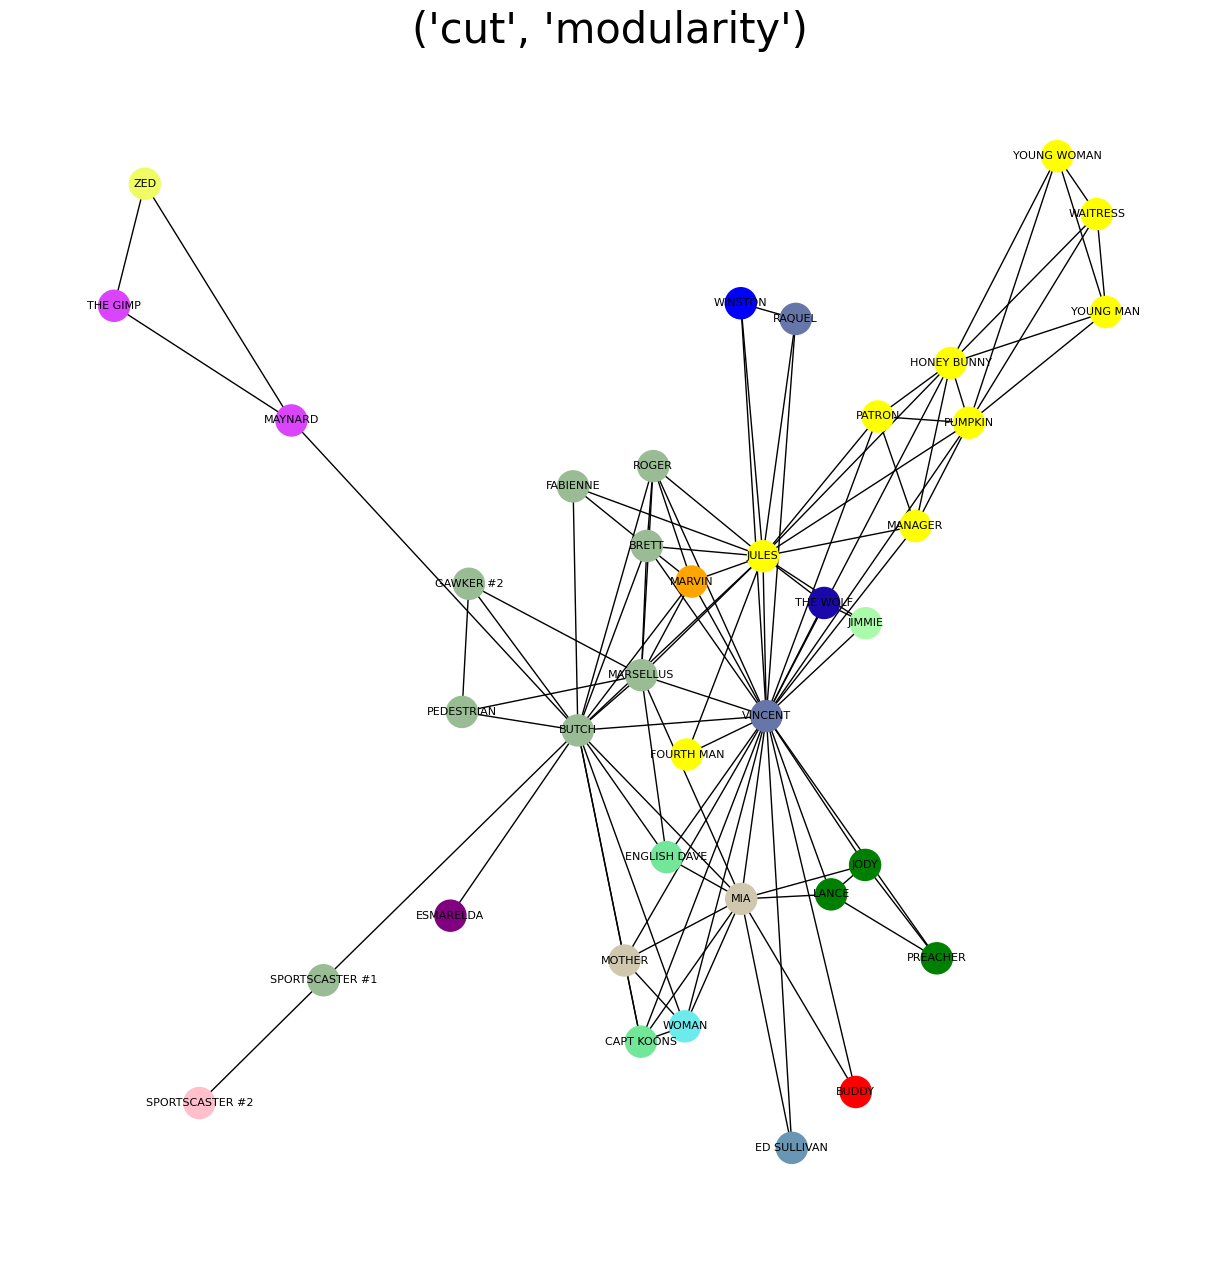

In [10]:
visualize_segmentation("networks/movies/pulpfiction.gexf", clustering, "cut", "modularity")

1226


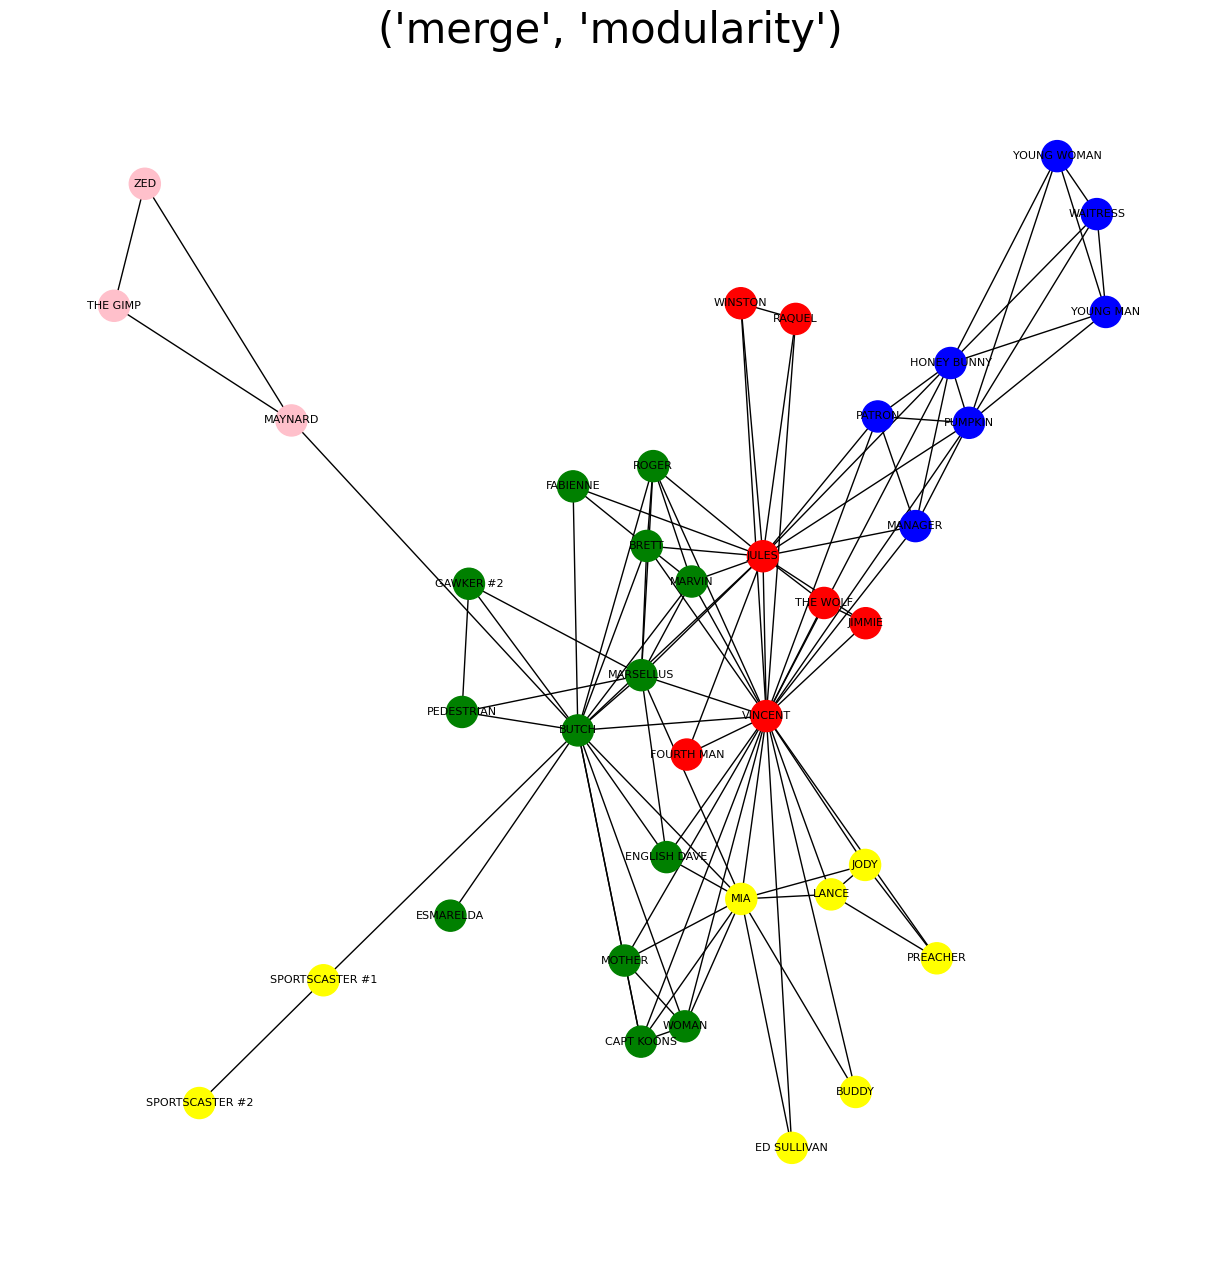

In [11]:
visualize_segmentation("networks/movies/pulpfiction.gexf", clustering, "merge", "modularity")

566


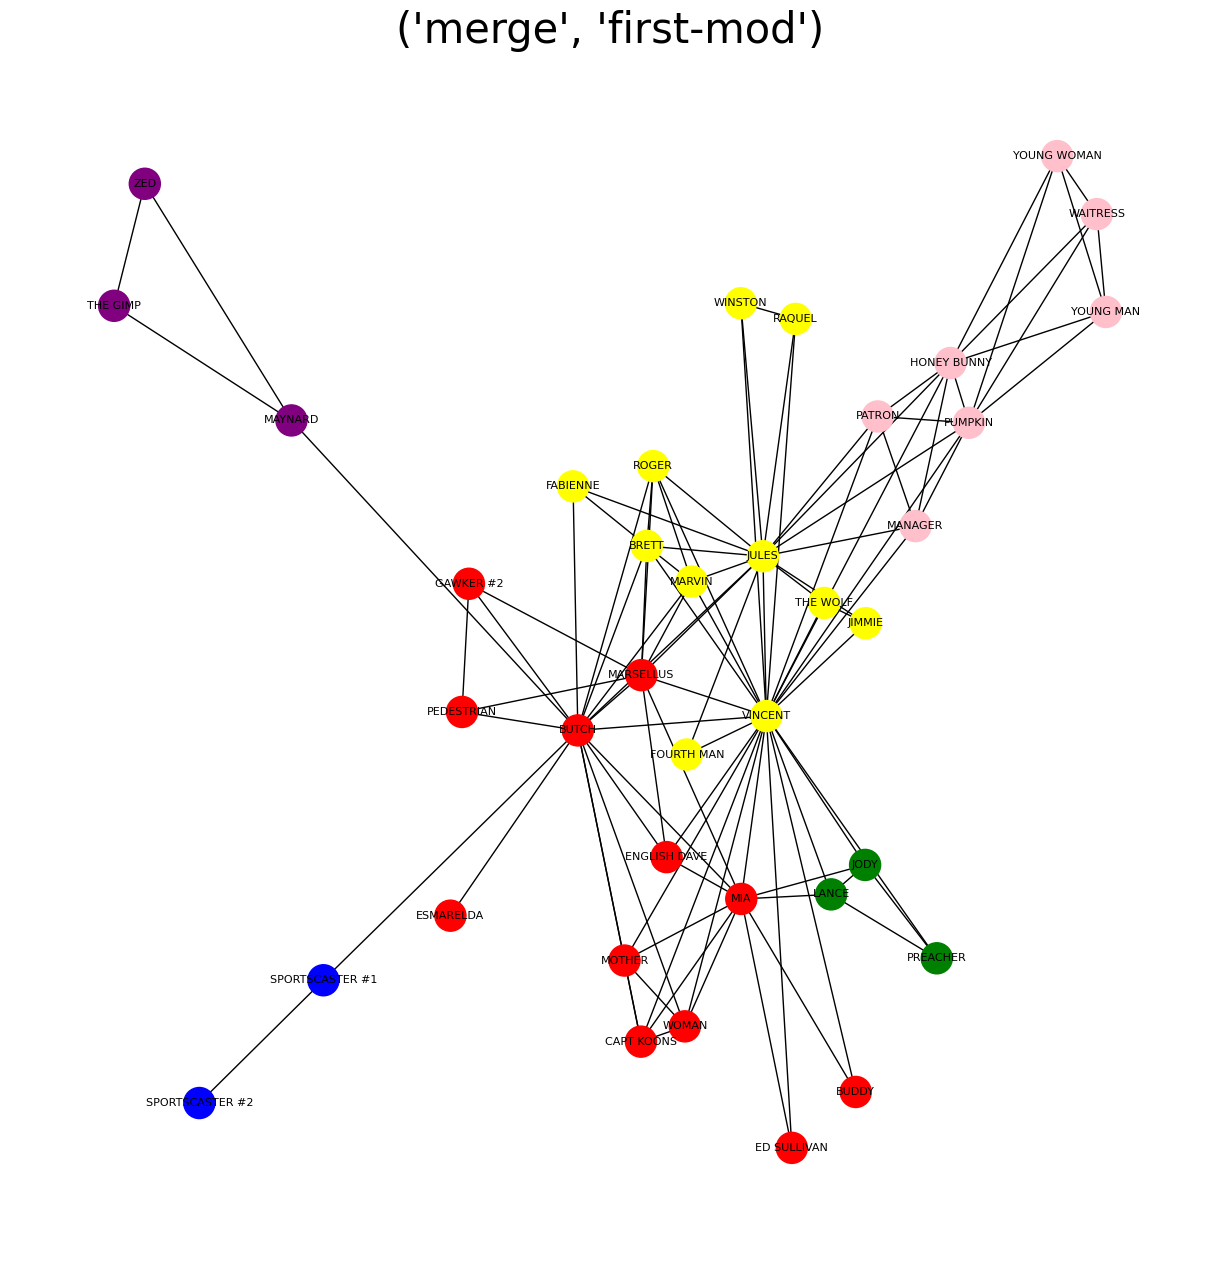

In [12]:
visualize_segmentation("networks/movies/pulpfiction.gexf", clustering, "merge", "first-mod")

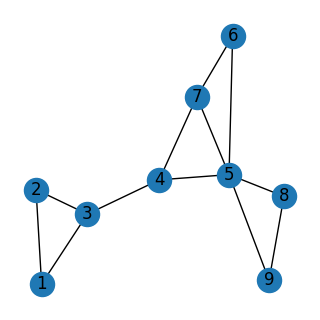

In [13]:
G = Graph()
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(3, 1)
G.add_edge(3, 4)
G.add_edge(4, 5)
G.add_edge(5, 6)
G.add_edge(6, 7)
G.add_edge(7, 4)
G.add_edge(5, 7)
G.add_edge(5, 8)
G.add_edge(8, 9)
G.add_edge(9, 5)

fig = plt.figure(figsize=(3, 3))
draw_graph(G, label_on=True)

In [14]:
print(Ca.first_heuristic(G))
print(Ca.first_heuristic(G, version="dis"))

print(Ca.second_heuristic(G))
print(Ca.second_heuristic(G, version="dis"))

([{'6', '7', '4'}, {'8', '5', '9'}, {'2', '3', '1'}], 0.3298611111111111)
([{'2', '1', '6', '9', '8', '3', '7', '4'}, {'5'}], -2.0)
([{'6', '7', '5', '9', '8', '4'}, {'2', '3'}, {'1'}], 0.4184027777777777)
([{'6'}, {'5'}, {'7'}, {'2'}, {'9', '3', '1', '4'}, {'8'}], -31.0)
